In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import random

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
def result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    # обучение
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    # вывод результатов
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    # вывод графика
    get_error_plot(n_trees, train_errors, test_errors)

#### 1.	Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. 
#### Сделать выводы о зависимости ошибки от этих параметров.

## Количество

Начнем с двух деревьев

Ошибка алгоритма из 2 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 3511.425944723719
Ошибка алгоритма из 2 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3711.2983813820315


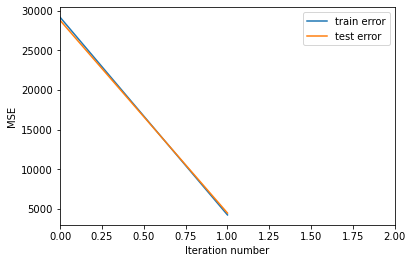

In [11]:
# Число деревьев в ансамбле
n_trees = 2

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Видно что ко второму дереву __точность__ резко __повысилась__

Продолжим тест - попробуем немного увеличить __количество деревьев__, что бы сделать график более информативным:<br>

Ошибка алгоритма из 4 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 3167.644532195719
Ошибка алгоритма из 4 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3318.878983421837


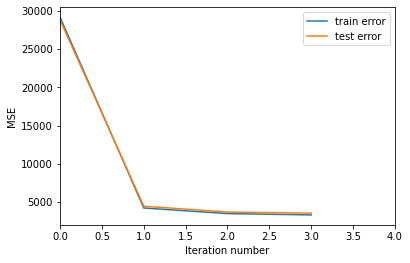

In [12]:
# Число деревьев в ансамбле
n_trees = 4

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

После второго дерева __ошибка стала падать__ болле плавно

Еще увеличим __количество__ деревьев

Ошибка алгоритма из 8 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2800.518991997473
Ошибка алгоритма из 8 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3497.062161712752


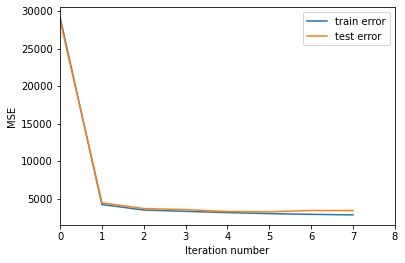

In [13]:
# Число деревьев в ансамбле
n_trees = 8

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Стал наблюдаться эффект __переобучения__ - __на тесте__ ошибка увеличилась, __на трейне__ стала еще ниже

## Глубина
Вернемся к __предыдушему__ вырианту и попробуем увеличить __глубину__ дерева

Ошибка алгоритма из 4 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2504.145348439411
Ошибка алгоритма из 4 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3608.261719255304


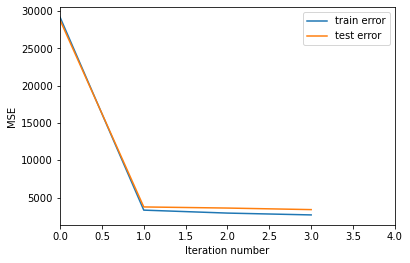

In [14]:
# Число деревьев в ансамбле
n_trees = 4

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Уже сразу можно сказать, что мы наблюдаем __переобучения__ - __на тесте__ ошибка увеличилась, __на трейне__ стала еще ниже

Что бы подтвердить это еще увеличим __глубину__

Ошибка алгоритма из 4 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 1299.413016835589
Ошибка алгоритма из 4 деревьев глубиной 4     с шагом 1 на тестовой выборке: 4782.119160991466


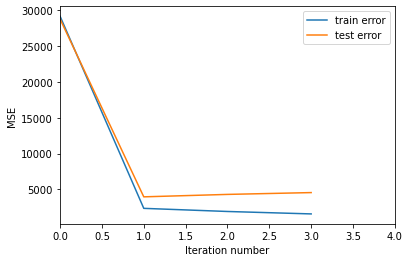

In [15]:
# Число деревьев в ансамбле
n_trees = 4

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

__Расхождение__ стало еще очевидней - на тесте ошибка __увеличивается__ в то время как на трейне __уменьшается__

__Лучший__ результат был у __глубины__ дерева = 1, с нее и продолжим тесты.

# Шаг
Теперь попробуем уменьшить __шаг__

Ошибка алгоритма из 4 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 3297.2559153030456
Ошибка алгоритма из 4 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3523.511625008209


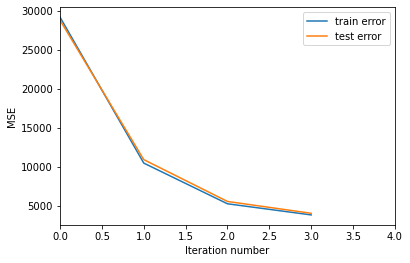

In [16]:
# Число деревьев в ансамбле
n_trees = 4

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Видно, что уменьшение __шага__ повлияло на __плавность снижения__ ошибки

__Добавим число деревьев__, что бы увеличить информативность

Ошибка алгоритма из 8 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2767.568903328521
Ошибка алгоритма из 8 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3231.838244569617


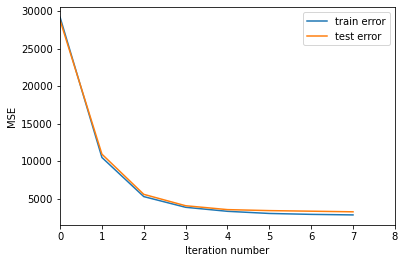

In [17]:
# Число деревьев в ансамбле
n_trees = 8

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка продолжает __падать__, __увеличим количество__ деревьев

Ошибка алгоритма из 16 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2491.8975421964687
Ошибка алгоритма из 16 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3156.7926545425703


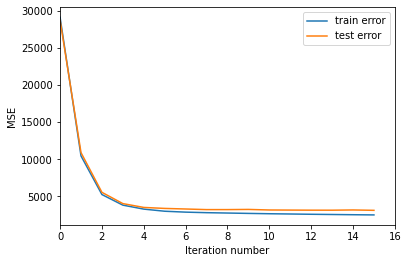

In [18]:
# Число деревьев в ансамбле
n_trees = 16

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка __уменьшилась__ еще немного, но начинает наблюдаться эффект __переобучения__

Увеличим еще добавим __количество__ деревьев

Ошибка алгоритма из 32 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2259.544662664208
Ошибка алгоритма из 32 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3127.4334981910047


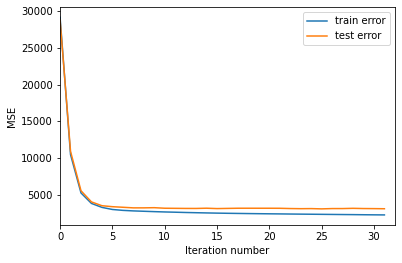

In [19]:
# Число деревьев в ансамбле
n_trees = 32

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Эффект __переобучения__ стал явным - точность __трейновой__ выборки повысилась, но точность __тестовой__ выборки упала.

#### 2*. 	Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. 	Размер подвыборки принять равным 0.5. 	Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [31]:
def get_subsample(X, y, ratio=0.5):
    total = len(X)
    ind = list(range(total))
    random.shuffle(ind)
    n_sample = round(total * ratio)
    ind = ind[:n_sample]
    return X[ind], y[ind]

In [37]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [32]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees = []
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # берем подвыборку
        X_sample, y_sample = get_subsample(X, y)

        if len(trees) == 0:
            tree.fit(X_sample, y_sample)
        else:
            target = gb_predict(X_sample, trees, coefs, eta)
            tree.fit(X_sample, bias(y_sample, target))
            
        train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
        test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [40]:
max_depth = 5
n_trees = 100
eta = 0.1
coefs = [1] * n_trees

trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

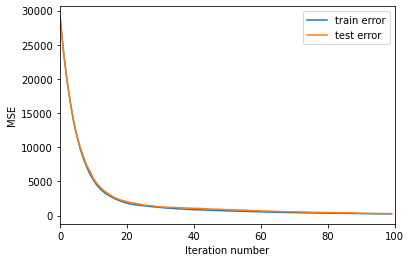

In [41]:
get_error_plot(n_trees, train_errors, test_errors)

Видно что обучение идет медленнее, но графики __теста__ и __трейна__ практически совпадают, и к 100 итеррациям алгоритм не переобучился, показывая очень достойный результат.